## Chương 8: Image Segmentation

#### __Bài tập 1:__ Sử dụng phép biến đổi Hough để phát hiện các hình ellipse từ một ảnh có chứa hình ellipse bằng thư viện scikit-image

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [ ]:
# matplotlib.pyplot để vẽ đồ thị và hiển thị ảnh
import matplotlib.pyplot as plt                     
# data, color, img_as_ubyte từ skimage để xử lý ảnh
from skimage import data, color, img_as_ubyte       
# canny từ skimage.feature để phát hiện cạnh
from skimage.feature import canny                   
# hough_ellipse từ skimage.transform để thực hiện phép biến đổi Hough cho ellipse
from skimage.transform import hough_ellipse         
# ellipse_perimeter từ skimage.draw để vẽ chu vi ellipse
from skimage.draw import ellipse_perimeter          

#### 2. Đọc và xử lý ảnh

In [ ]:
# Đọc ảnh mẫu coffee từ skimage.data và cắt một phần của ảnh
image_rgb = data.coffee()[0:220, 160:420]           
# Chuyển đổi ảnh từ rgb sang grayscale
image_gray = color.rgb2gray(image_rgb)              
# Sử dụng bộ lọc Canny để phát hiện cạnh trong ảnh grayscale với các tham số sigma, low_threshold và high_threshold
edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

#### 3. Thực hiện phép biến đổi Hough để phát hiện ellipse

In [ ]:
# Thực hiện phép biến đổi Hough để phát hiện các ellipse trong ảnh cạnh edges với các tham số accuracy, threshold, min_size và max_size
result = hough_ellipse(edges, accuracy=20, threshold=250, min_size=100, max_size=120)
# Sắp xếp kết quả theo giá trị accumulator để tìm ellipse tốt nhất
result.sort(order='accumulator')

#### 4. Lấy thông tin của ellipse tốt nhất

In [ ]:
# Lấy thông tin của ellipse tốt nhất từ kết quả đã sắp xếp
best = list(result[-1])                            
# Lấy tọa độ tâm (yc, xc), bán trục lớn (a), bán trục nhỏ (b) và góc nghiêng (orientation) của ellipse
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5]

#### 5. Vẽ chu vi ellipse trên ảnh gốc

In [ ]:
# Tính toán các điểm chu vi của ellipse
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)   
# Vẽ chu vi ellipse trên ảnh gốc image_rgd bằng màu đỏ (0, 0, 255)
image_rgb[cy, cx] = (0, 0, 255)                         

#### 6. Chuyển đổi ảnh cạnh sang RGB và vẽ chu vi ellipse

In [ ]:
# Chuyển ảnh ảnh cạnh edges từ grayscale sang rgb   
edges = color.gray2rgb(img_as_ubyte(edges))             
# Vẽ chu vi ellipse trên ảnh cạnh edges bằng màu đỏ (250, 0, 0)
edges[cy, cx] = (250, 0, 0)                             

#### 7. Hiển thị và lưu kết quả

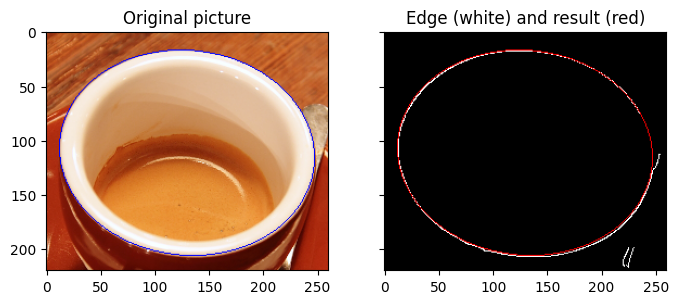

In [ ]:
# Tạo một hình ảnh với kích thước 8x4 inch và chia thành 2 ô (1 hàng, 1 cột)
fig2, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True
)
# Hiển thị ảnh gốc image_rgb trong ô đầu tiên
ax1.set_title('Original picture')
ax1.imshow(image_rgb)
# Hiển thị ảnh cạnh edges trong ô thứ hai
ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)
# Lưu hình ảnh kết quả thành file jpg
plt.savefig('ellipse_detection_coffee.jpg')
plt.show()